In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
principals_DF = pd.read_csv('D:/Data analyst/Wild code school/Projets/Projet 2 - Pandas/BD/title.principals.tsv', sep = '\t')

In [3]:
principals_DF.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [4]:
#Filtrer les acteurs
Actors = principals_DF[(principals_DF['category'].str.contains('actor', na = False)) 
                  | (principals_DF['category'].str.contains('actress', na = False))]

In [6]:
Actors.head()

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N
17,tt0000007,2,nm0183947,actor,\N,\N
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"


In [5]:
len(Actors)

18749225

In [23]:
filmActors = pd.DataFrame(Actors.groupby('nconst').size())

In [31]:
filmActors.rename(columns={0: 'nbFilm'}, inplace = True)

In [26]:
name_DF = pd.read_csv('D:/Data analyst/Wild code school/Projets/Projet 2 - Pandas/BD/name.basics.tsv', sep = '\t')

In [27]:
name_DF.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0049189,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0083922,tt0050986,tt0050976"


In [41]:
filmActors = filmActors.sort_values(['nbFilm'], ascending = False)
filmActors.head(20)

,nbFilm
nconst,
nm10120013,9708
nm1426682,7834
nm0004471,7146
nm6427507,6213
nm0151534,5879
nm0746709,5628
nm10117174,5606
nm1310779,5200
nm1119913,5054


In [44]:
filmActors2 = filmActors.head(20)
filmActors2

,nbFilm
nconst,
nm10120013,9708
nm1426682,7834
nm0004471,7146
nm6427507,6213
nm0151534,5879
nm0746709,5628
nm10117174,5606
nm1310779,5200
nm1119913,5054


In [48]:
filmActors3 = filmActors2.merge(name_DF, how = 'left', left_on = 'nconst', right_on = 'nconst')

In [49]:
filmActors3

,nconst,nbFilm,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm10120013,9708,Sameera Sherief,\N,\N,"actress,producer","tt8998500,tt8997494,tt8998380,tt8996230"
1,nm1426682,7834,Delhi Kumar,\N,\N,actor,"tt1655607,tt1305797,tt14751870,tt14751736"
2,nm0004471,7146,Subhalekha Sudhakar,\N,\N,"actor,miscellaneous","tt6836936,tt6485666,tt8269248,tt7838252"
3,nm6427507,6213,Neha Gowda,\N,\N,actress,"tt11501436,tt13677378,tt15079894,tt12229190"
4,nm0151534,5879,Sudha Chandran,1965,\N,actress,"tt11033894,tt1491938,tt0102746,tt5323298"
5,nm0746709,5628,Jada Rowland,1943,\N,actress,"tt0046641,tt0063951,tt0046637,tt0048845"
6,nm10117174,5606,Pallavi Ramisetty,\N,\N,actress,"tt8994152,tt8993360,tt8988732"
7,nm1310779,5200,Manuela do Monte,1984,\N,actress,"tt0420382,tt2478706,tt2734004,tt1692131"
8,nm1119913,5054,Vadivukkarasi,\N,\N,"actress,music_department,soundtrack","tt0479751,tt0213969,tt10661848,tt0384495"
9,nm0387617,5037,Peter Hobbs,1918,2011,actor,"tt0066769,tt0080319,tt0085894,tt0070707"


Text(0.5, 1.0, 'Les 20 acteurs ayant tournés le plus de film depuis 1960')

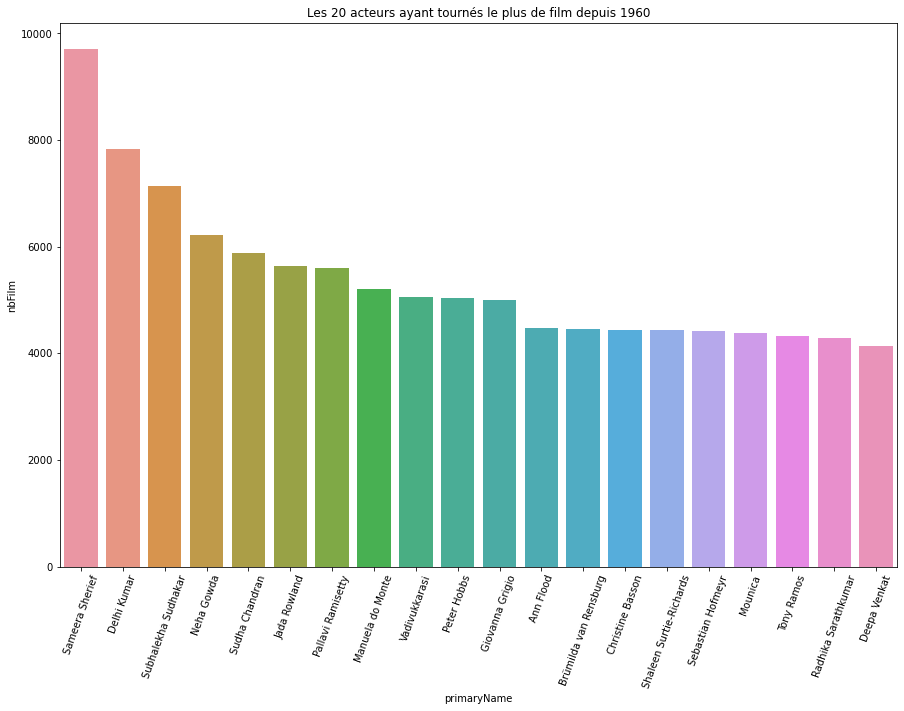

In [54]:
plt.figure(figsize=(15,10))
sns.barplot(x=filmActors3['primaryName'], y=filmActors3['nbFilm'])
plt.xticks(rotation= 70)
plt.xlabel('primaryName')
plt.ylabel('nbFilm')
plt.title('Les 20 acteurs ayant tournés le plus de film depuis 1960')